In [3]:
# Cell 1: Imports
import string

import pandas as pd
from accuracy_functions import (
    analyze_char_confusion,
    analyze_digit_confusion,
    evaluate_accuracy,
    evaluate_numeric_errors,
    evaluate_numeric_with_confusion,
    evaluate_text_with_char_confusion,
    plot_error_distribution,
)

In [4]:
# Cell 2: File paths + columns
years = [1920, 1940, 1980]
file_map = {
    1920: ("1920pg9/1920pg9_correct.csv", "1920pg9/1920p9_rawoutput.csv"),
    1940: ("1940full/1940human.csv", "1940full/1940raw.csv"),
    1980: ("1980pg3/1980pg3_correct.csv", "1980pg3/1980pg3_rawoutput.csv"),
}
numeric_cols = ["YEAR", "CONGRESSIONAL_DISTRICT", "VOTES"]
text_cols = ["STATE", "RACE_TYPE", "CANDIDATE_NAME", "CANDIDATE_PARTY"]

In [5]:
# Cell 3: Load data for each year
dfs = {}
for y in years:
    hc, ac = file_map[y]
    dfh = pd.read_csv(hc)
    dfai = pd.read_csv(ac)
    dfs[y] = (dfh, dfai)
    print(y, "- Human:", len(dfh), "AI:", len(dfai))

1920 - Human: 82 AI: 82
1940 - Human: 368 AI: 368
1980 - Human: 35 AI: 35


In [6]:
# Cell 4: Evaluate overall accuracy
for y in years:
    dfh, dfai = dfs[y]
    res = evaluate_accuracy(dfh, dfai, numeric_cols, text_cols)
    print(
        y,
        "Digit-Acc:",
        res["digit_level_accuracy"],
        "LevDist:",
        res["avg_levenshtein_dist"],
    )

1920 Digit-Acc: 0.9850427350427351 LevDist: 0.03353658536585366
1940 Digit-Acc: 0.9814772467413675 LevDist: 0.07880434782608696
1980 Digit-Acc: 0.9876237623762376 LevDist: 0.0


In [7]:
# Cell 5: Numeric confusion
for y in years:
    dfh, dfai = dfs[y]
    nc = evaluate_numeric_with_confusion(dfh, dfai, numeric_cols)
    print(y, "Digit-Acc:", nc["digit_level_accuracy"])
    analyze_digit_confusion(nc["confusion_matrix"])

1920 Digit-Acc: 0.8675213675213675
Digit Confusion Matrix (rows=GT digit, cols=Pred digit):
[[178   0   0   0   0   0   0   0   0   1]
 [  0 132   0   0   0   0   0   0   0   0]
 [  0   0 132   0   0   0   0   0   0   0]
 [  0   0   0  44   2   0   0   0   0   0]
 [  0   0   1   0  44   0   0   0   0   0]
 [  0   0   0   1   0  44   0   0   2   1]
 [  0   1   0   0   0   0  36   0   1   0]
 [  0   0   0   0   0   0   0  46   0   0]
 [  0   0   0   1   0   0   0   0  36   0]
 [  2   0   0   0   1   0   0   0   0 120]] 

Ground Truth 0, top predicted 0 (178 times)
Ground Truth 1, top predicted 1 (132 times)
Ground Truth 2, top predicted 2 (132 times)
Ground Truth 3, top predicted 3 (44 times)
Ground Truth 4, top predicted 4 (44 times)
Ground Truth 5, top predicted 5 (44 times)
Ground Truth 6, top predicted 6 (36 times)
Ground Truth 7, top predicted 7 (46 times)
Ground Truth 8, top predicted 8 (36 times)
Ground Truth 9, top predicted 9 (120 times)
1940 Digit-Acc: 0.8705694031557283
Digit 

In [8]:
# Cell 6: Text char confusion
for y in years:
    dfh, dfai = dfs[y]
    tc = evaluate_text_with_char_confusion(dfh, dfai, text_cols, string.ascii_lowercase)
    analyze_char_confusion(tc["master_char_confusion"], string.ascii_lowercase)
    for c, info in tc["per_column"].items():
        print(y, c, "Exact:", info["exact_match_rate"])

Character Confusion Matrix shape: (26, 26)
GT 'a' -> top pred 'a'
GT 'b' -> top pred 'b'
GT 'c' -> top pred 'c'
GT 'd' -> top pred 'd'
GT 'e' -> top pred 'e'
GT 'f' -> top pred 'f'
GT 'g' -> top pred 'g'
GT 'h' -> top pred 'h'
GT 'i' -> top pred 'i'
GT 'j' -> top pred 'j'
GT 'k' -> top pred 'k'
GT 'l' -> top pred 'l'
GT 'm' -> top pred 'm'
GT 'n' -> top pred 'n'
GT 'o' -> top pred 'o'
GT 'p' -> top pred 'p'
GT 'q' -> top pred 'q'
GT 'r' -> top pred 'r'
GT 's' -> top pred 's'
GT 't' -> top pred 't'
GT 'u' -> top pred 'u'
GT 'v' -> top pred 'v'
GT 'w' -> top pred 'w'
GT 'y' -> top pred 'y'
GT 'z' -> top pred 'z'
1920 STATE Exact: 1.0
1920 RACE_TYPE Exact: 1.0
1920 CANDIDATE_NAME Exact: 0.926829268292683
1920 CANDIDATE_PARTY Exact: 1.0
Character Confusion Matrix shape: (26, 26)
GT 'a' -> top pred 'a'
GT 'b' -> top pred 'b'
GT 'c' -> top pred 'c'
GT 'd' -> top pred 'd'
GT 'e' -> top pred 'e'
GT 'f' -> top pred 'f'
GT 'g' -> top pred 'g'
GT 'h' -> top pred 'h'
GT 'i' -> top pred 'i'
GT 'j' 

1920 MAE: nan MAPE: nan
   YEAR MAE= 0.0 MAPE= 0.0
   CONGRESSIONAL_DISTRICT MAE= nan MAPE= nan
   VOTES MAE= 251.390243902439 MAPE= 0.03204876082870016


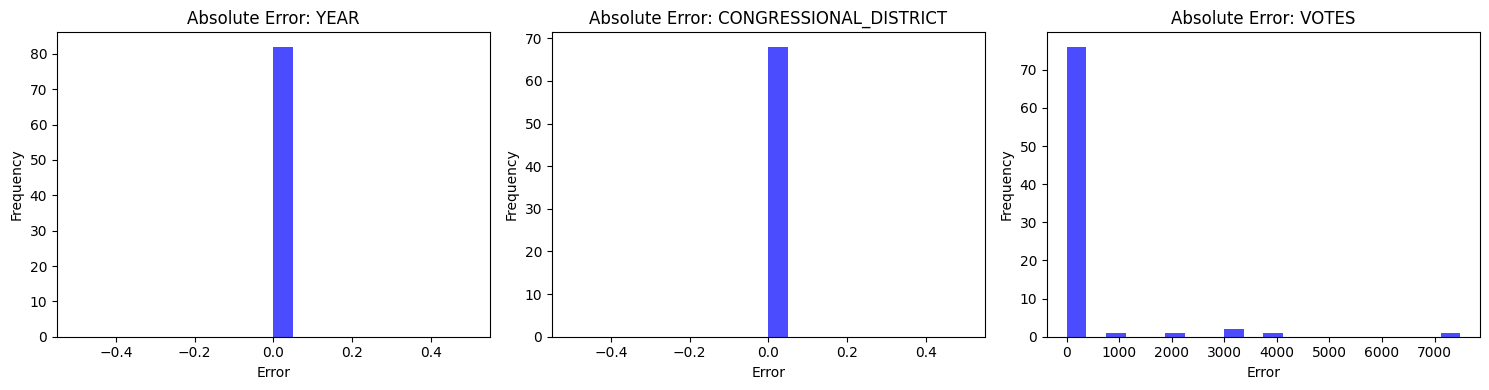

1940 MAE: nan MAPE: nan
   YEAR MAE= nan MAPE= nan
   CONGRESSIONAL_DISTRICT MAE= nan MAPE= nan
   VOTES MAE= nan MAPE= nan


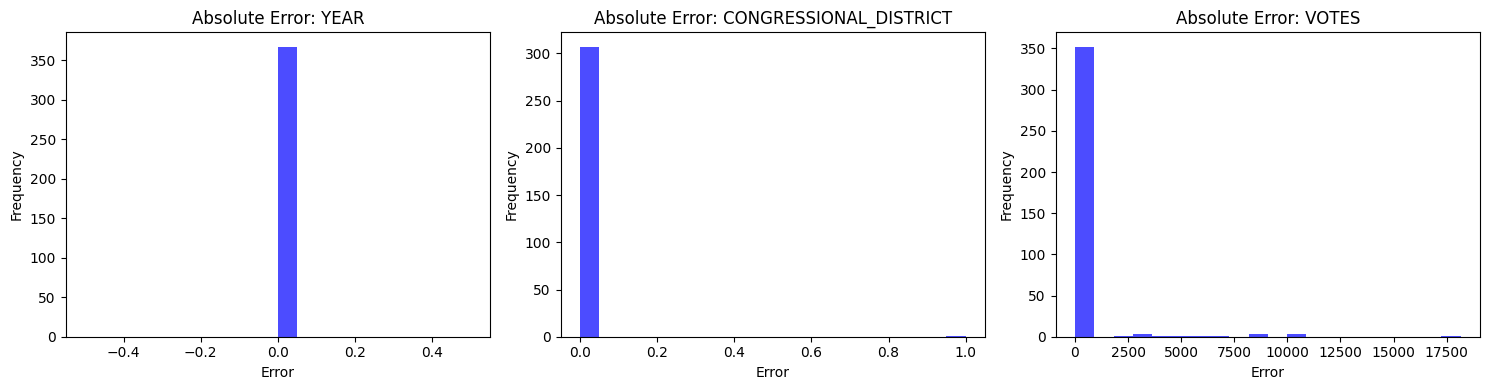

1980 MAE: nan MAPE: nan
   YEAR MAE= 0.0 MAPE= 0.0
   CONGRESSIONAL_DISTRICT MAE= nan MAPE= nan
   VOTES MAE= 46.97142857142857 MAPE= 0.012782739520983221


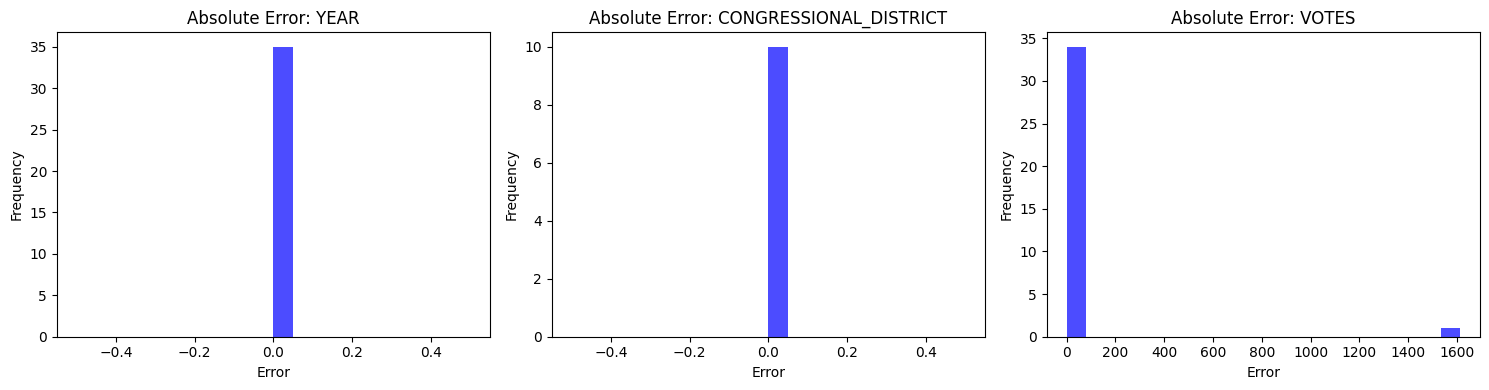

In [9]:
# Cell 7: Numeric error metrics + distribution
for y in years:
    dfh, dfai = dfs[y]
    errs = evaluate_numeric_errors(dfh, dfai, numeric_cols)
    print(y, "MAE:", errs["overall_mae"], "MAPE:", errs["overall_mape"])
    for c, st in errs["per_column"].items():
        print("  ", c, "MAE=", st["mae"], "MAPE=", st["mape"])
    plot_error_distribution(errs["abs_errors_by_col"])